# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
terrorism_df = pd.read_excel('/kaggle/input/global-terrorism-index-2023/Global Terrorism Index 2023.xlsx')

# ***Data Preview***

In [3]:
terrorism_df.head(10)

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012
5,NGA,Nigeria,6,8.098342,212,767,496,9,2012
6,SOM,Somalia,7,7.964123,166,446,427,1,2012
7,IND,India,8,7.814715,219,150,256,41,2012
8,THA,Thailand,9,7.499810,199,184,493,0,2012
9,RUS,Russia,10,7.490145,219,157,309,3,2012


***Dataset overview***
1. **iso3c: ISO 3166-1 alpha-3 code of the country where the incident occurred.**
2. **Country: Name of the country where the incident occurred.**
3. **Rank: Rank of the country based on the number of incidents.**
4. **Score: Score of the country based on the number of incidents, fatalities, injuries, and hostages.**
5. **Incidents: Number of terrorist incidents in the country.**
6. **Fatalities: Number of fatalities due to terrorist incidents in the country.**
7. **Injuries: Number of injuries due to terrorist incidents in the country.**
8. **Hostages: Number of hostages taken due to terrorist incidents in the country.**
9. **Year: Year in which the terrorist incident occurred.**

# ***Data Exploration***

In [4]:
terrorism_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


In [5]:
terrorism_df.shape

(1793, 9)

In [6]:
terrorism_df.dtypes

iso3c          object
Country        object
Rank            int64
Score         float64
Incidents       int64
Fatalities      int64
Injuries        int64
Hostages        int64
Year            int64
dtype: object

In [7]:
terrorism_df.columns

Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')

In [8]:
terrorism_df.describe()

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


# ***Data Preprocessing***

In [9]:
# Check for missing values
missing_values = terrorism_df.isnull().sum()
missing_values

iso3c         0
Country       0
Rank          0
Score         0
Incidents     0
Fatalities    0
Injuries      0
Hostages      0
Year          0
dtype: int64

In [10]:
# Remove duplicates
terrorism_df.drop_duplicates(inplace=True)

# ***Data Visualization and Analysis***

In [11]:
# Group incidents, fatalities, injuries, and hostages by year
incidents_by_year = terrorism_df.groupby(terrorism_df['Year'])['Incidents'].sum()
fatalities_by_year = terrorism_df.groupby(terrorism_df['Year'])['Fatalities'].sum()
injuries_by_year = terrorism_df.groupby(terrorism_df['Year'])['Injuries'].sum()
hostages_by_year = terrorism_df.groupby(terrorism_df['Year'])['Hostages'].sum()

In [12]:
print(f'incidents by year : {incidents_by_year}')
print('----------------------')
print(f'fatalities by year : {fatalities_by_year}')
print('----------------------')
print(f'injuries by year : {injuries_by_year}')
print('----------------------')
print(f'hostages by year : {hostages_by_year}')

incidents by year : Year
2012    4711
2013    4371
2014    3546
2015    3632
2016    4210
2017    4517
2018    4829
2019    4118
2020    4541
2021    5443
2022    3955
Name: Incidents, dtype: int64
----------------------
fatalities by year : Year
2012     9227
2013    10317
2014    10129
2015    10881
2016    10372
2017     8932
2018     7480
2019     7193
2020     7433
2021     7328
2022     6701
Name: Fatalities, dtype: int64
----------------------
injuries by year : Year
2012    16915
2013    19304
2014    13827
2015    17473
2016    10372
2017    14583
2018    10978
2019     9350
2020     7660
2021     7283
2022     5993
Name: Injuries, dtype: int64
----------------------
hostages by year : Year
2012     800
2013     734
2014     853
2015    1709
2016     403
2017     572
2018    1544
2019    9350
2020    1301
2021     599
2022     333
Name: Hostages, dtype: int64


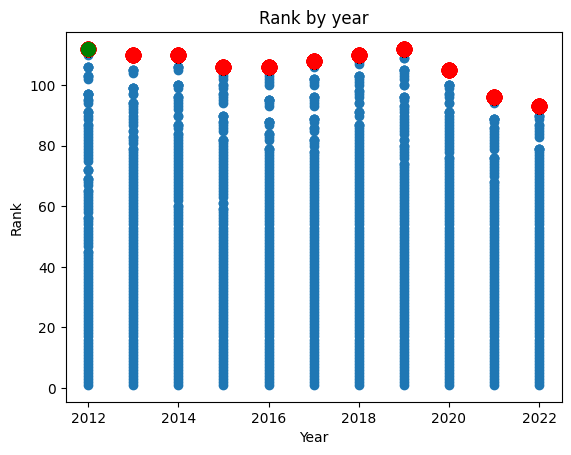

heighest year : 2012 with : 112


In [13]:
plt.scatter(terrorism_df['Year'], terrorism_df['Rank'])
maximum = dict()
for year in terrorism_df['Year']:
    max_score = terrorism_df[terrorism_df['Year'] == year]['Rank'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Rank by year')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()
print(f'heighest year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]}')

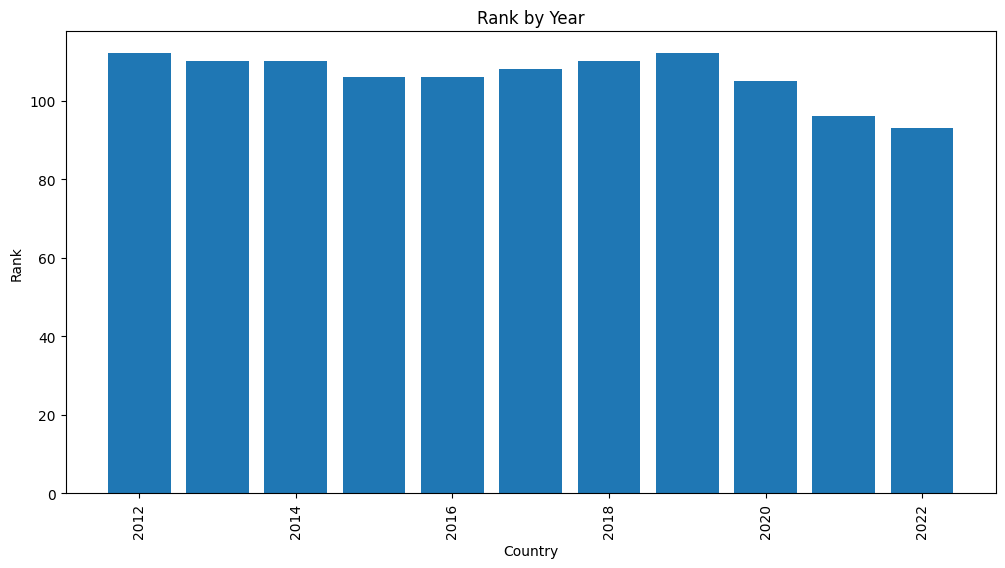

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(terrorism_df['Year'], terrorism_df['Rank'])
plt.title('Rank by Year')
plt.xlabel('Country')
plt.ylabel('Rank')
plt.xticks(rotation=90)
plt.show()

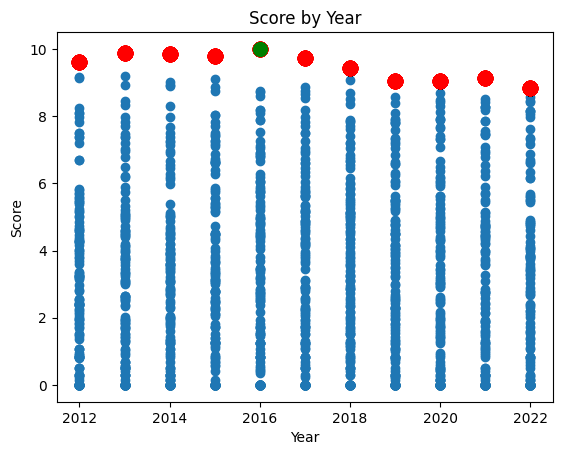

heighest year : 2016 with : 10.0


In [15]:
plt.scatter(terrorism_df['Year'], terrorism_df['Score'])
maximum = dict()
for year in terrorism_df['Year']:
    max_score = terrorism_df[terrorism_df['Year'] == year]['Score'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Score by Year')
plt.xlabel('Year')
plt.ylabel('Score')
plt.show()
print(f'heighest year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]}')

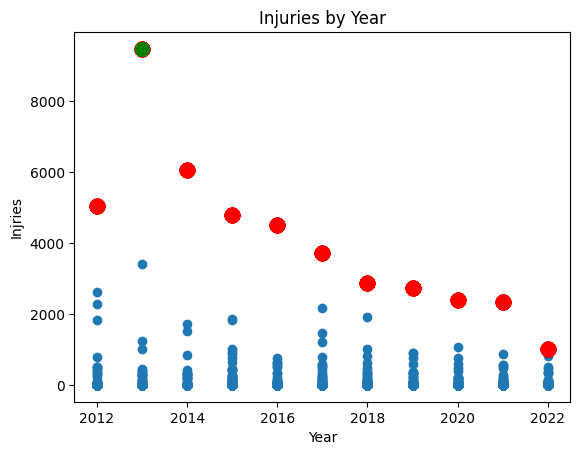

heighest time in year : 2013 with : 9479 injury


In [16]:
plt.scatter(terrorism_df['Year'], terrorism_df['Injuries'])
maximum = dict()
for year in terrorism_df['Year']:
    max_score = terrorism_df[terrorism_df['Year'] == year]['Injuries'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Injries')
plt.show()
print(f'heighest time in year : {max(maximum,key=maximum.get)} with : {maximum[max(maximum,key=maximum.get)]} injury')

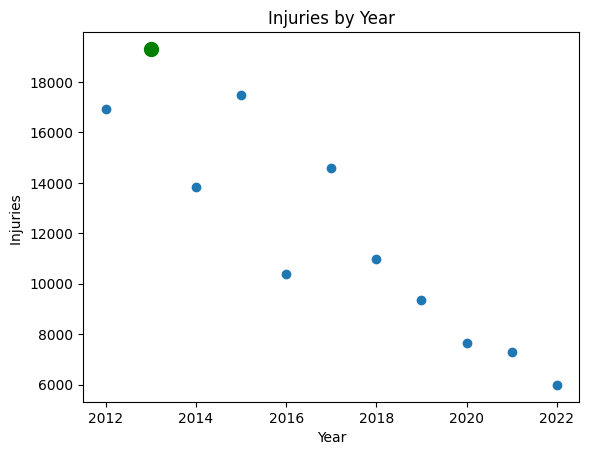

heighest injuries in year : 2013 with : 19304 injury


In [17]:
# Filter out None (or missing) values before finding the maximum
injuries_by_year2 = {year: count for year, count in injuries_by_year.items() if count is not None}

# Find the year with the maximum injuries
year_with_max_injuries = max(injuries_by_year2, key=injuries_by_year2.get)

plt.scatter(terrorism_df['Year'].unique(), injuries_by_year)
plt.plot(year_with_max_injuries,injuries_by_year.max(), marker='o', markersize=10, color="green")
plt.title('Injuries by Year')
plt.xlabel('Year')
plt.ylabel('Injuries ')
plt.show()
plt.show()
print(f'heighest injuries in year : {year_with_max_injuries} with : {injuries_by_year.max()} injury')

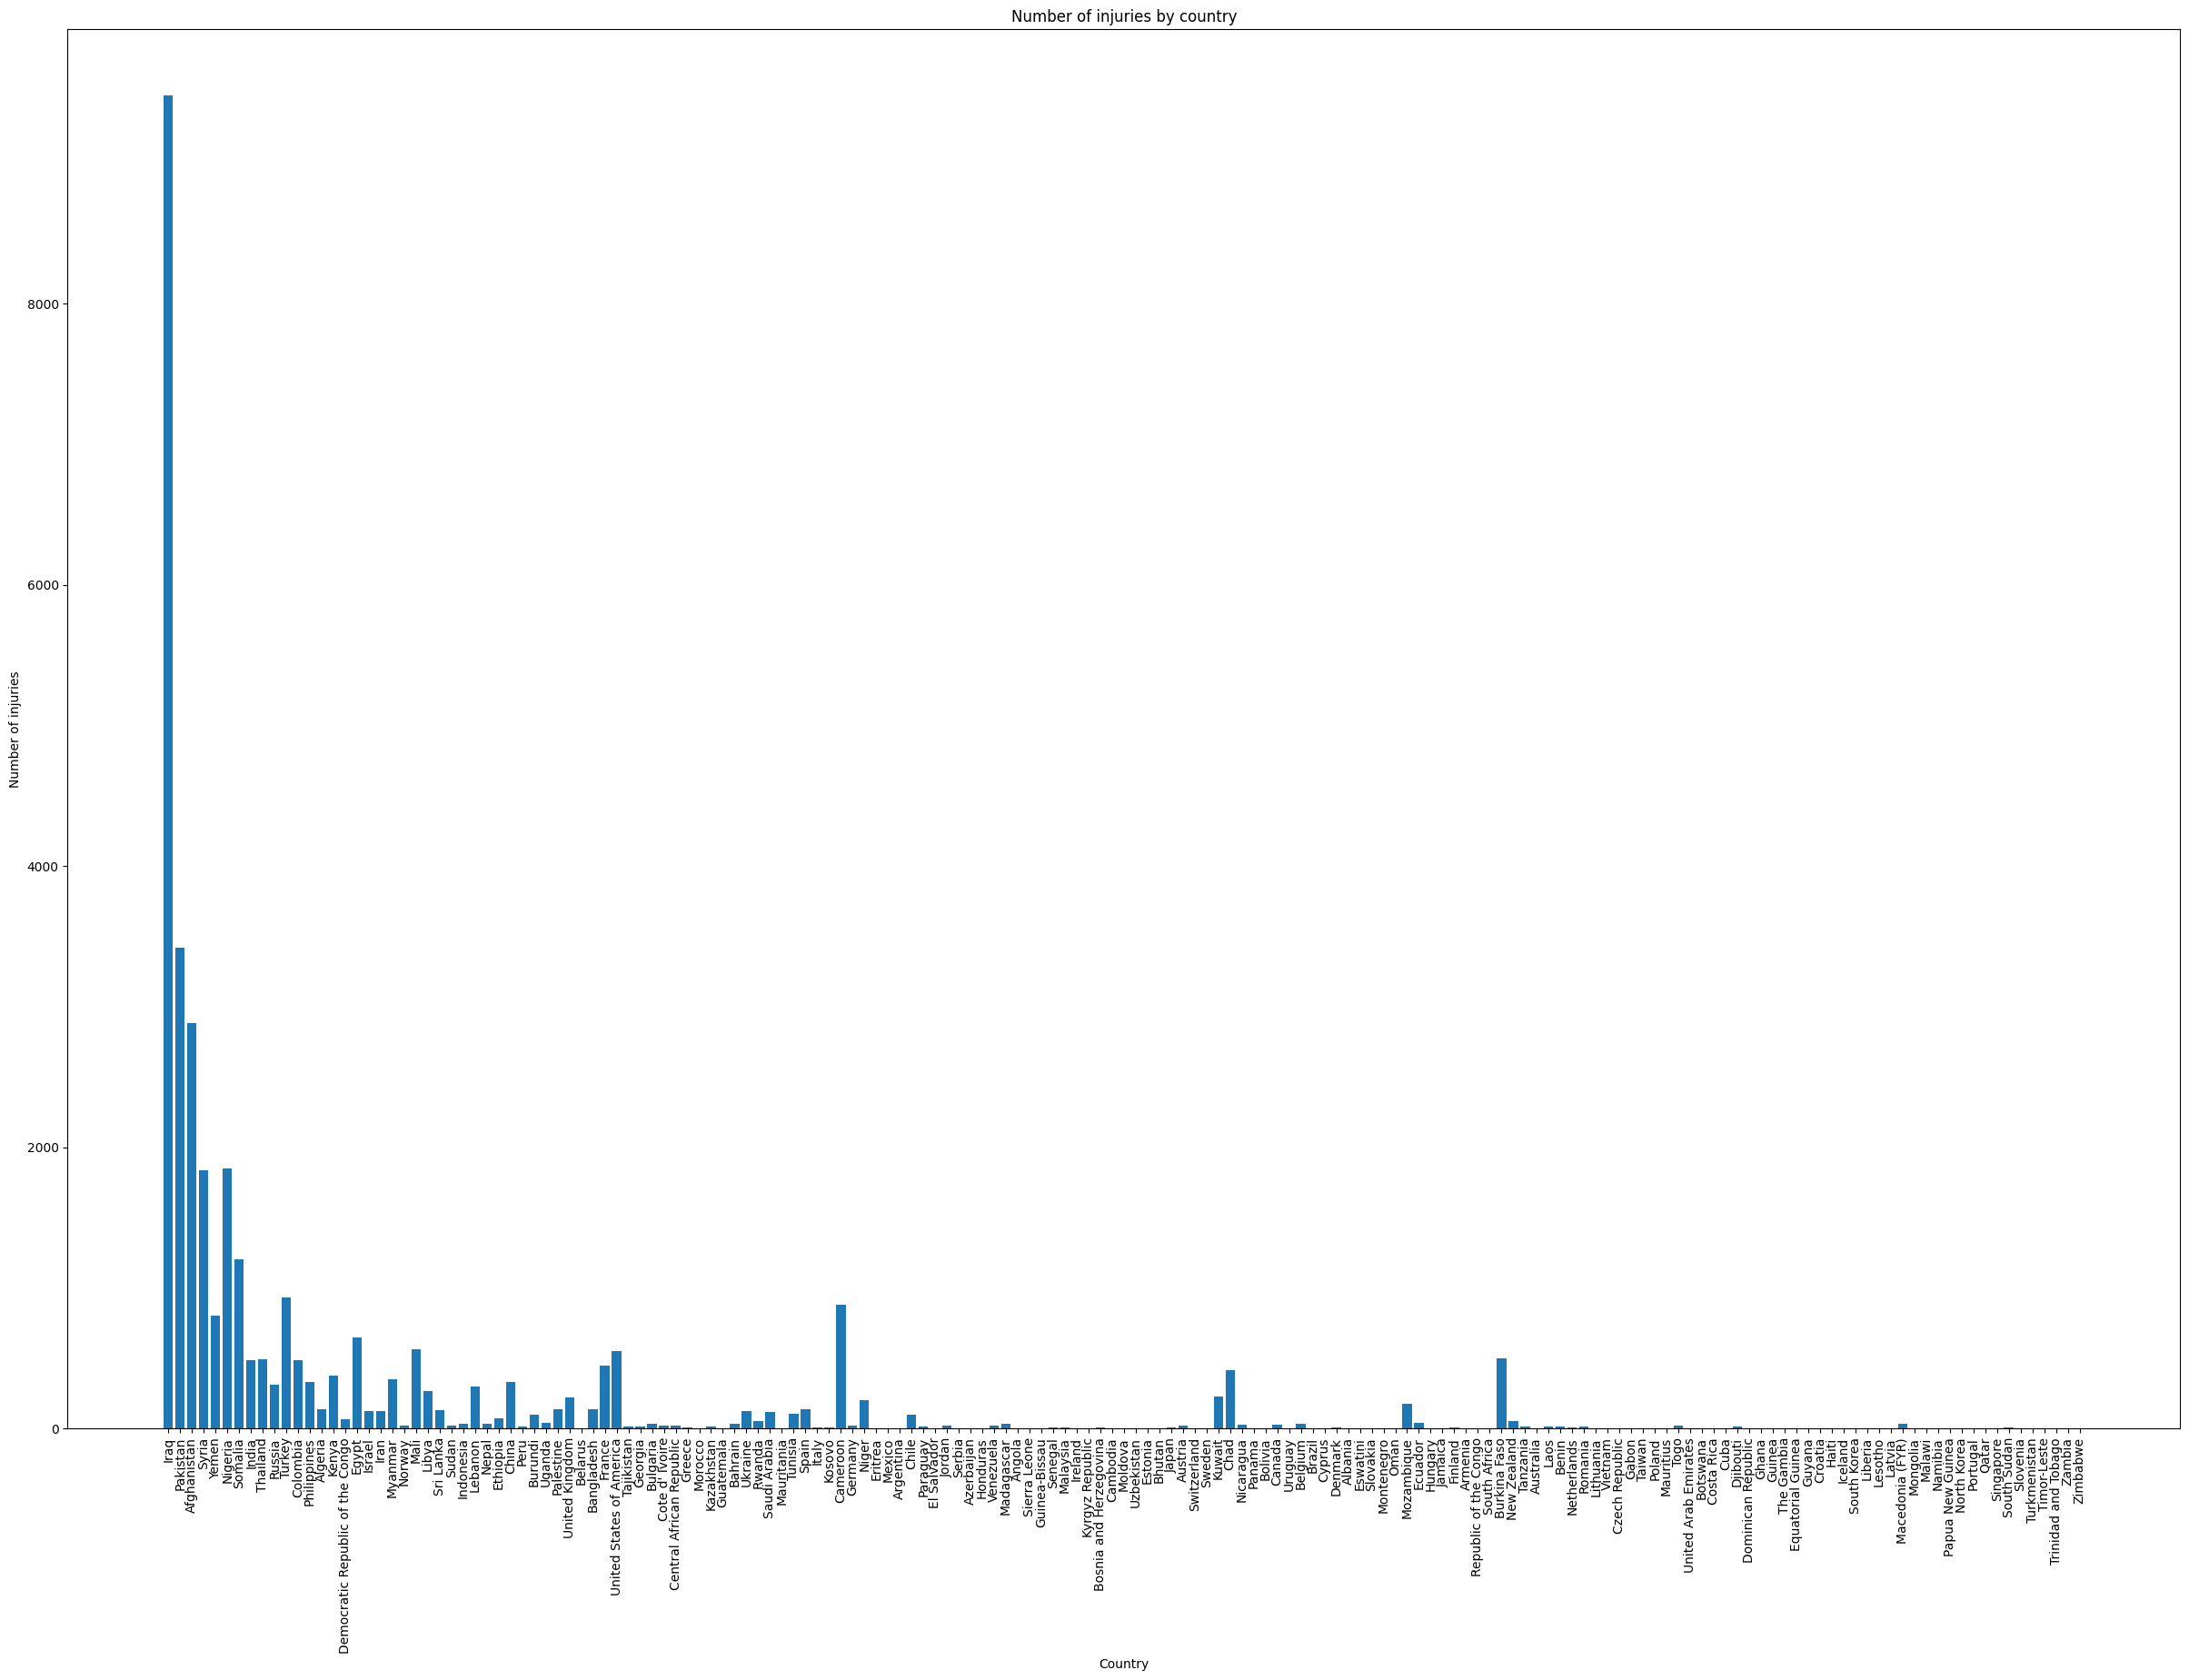

In [18]:
plt.figure(figsize=(30, 20))
plt.bar(terrorism_df['Country'], terrorism_df['Injuries'])
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of injuries')
plt.title('Number of injuries by country')
plt.show()

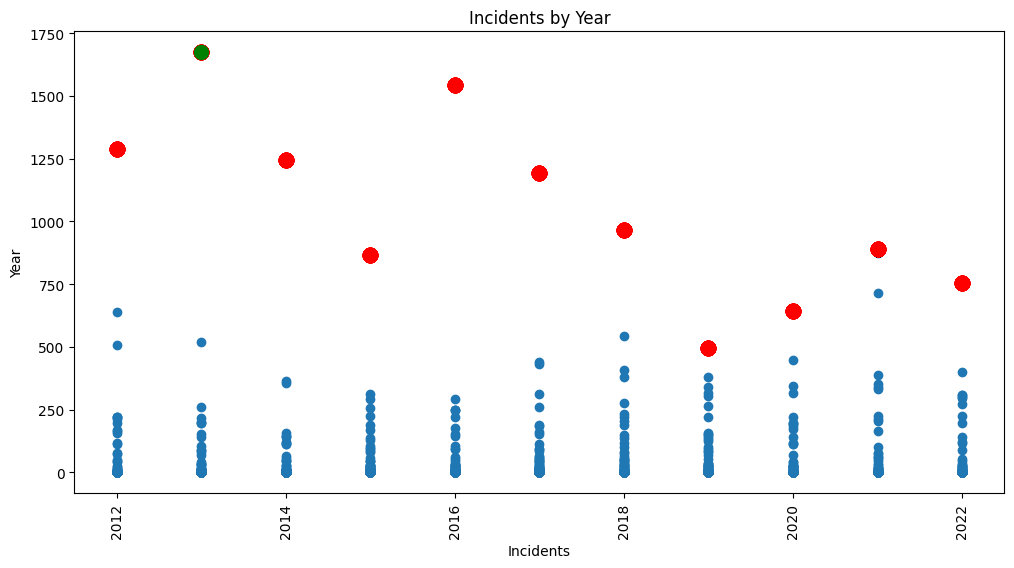

heighest time in year : 2013 with 1673 incident


In [19]:
plt.figure(figsize=(12,6))
plt.scatter(terrorism_df['Year'], terrorism_df['Incidents'])
maximum = dict()
for year in terrorism_df['Year']:
    max_score = terrorism_df[terrorism_df['Year'] == year]['Incidents'].max()
    maximum[year] = max_score
    plt.plot(year, max_score, marker='o', markersize=10, color="red")
plt.plot(max(maximum,key=maximum.get),maximum[max(maximum,key=maximum.get)], marker='o', markersize=10, color="green")
plt.title('Incidents by Year')
plt.xlabel('Incidents')
plt.ylabel('Year')
plt.xticks(rotation=90)
plt.show()
print(f'heighest time in year : {max(maximum,key=maximum.get)} with {maximum[max(maximum,key=maximum.get)]} incident')

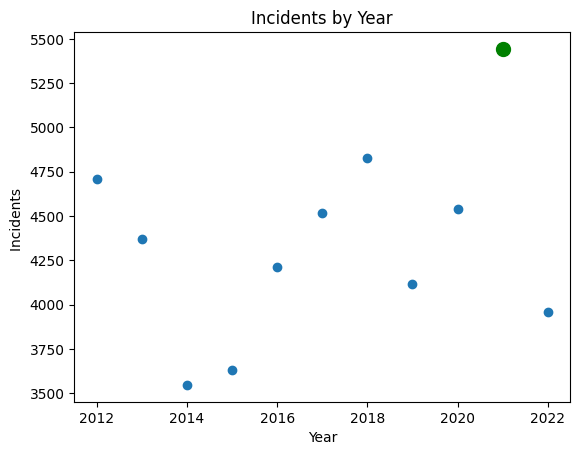

heighest incidents in year : 2021 with : 5443 incident


In [20]:
incidents_by_year2 = {year: count for year, count in incidents_by_year.items() if count is not None}

year_with_max_incidents = max(incidents_by_year2, key=incidents_by_year2.get)

plt.scatter(terrorism_df['Year'].unique(), incidents_by_year)
plt.plot(year_with_max_incidents,incidents_by_year.max(), marker='o', markersize=10, color="green")
plt.title('Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Incidents ')
plt.show()
plt.show()
print(f'heighest incidents in year : {year_with_max_incidents} with : {incidents_by_year.max()} incident')

# Report
1. **The year that record the heighest rank is '2012' with 112**
2. **The year that record the heighest score is  '2016' with  10.0**
3. **The year that record the heighest injuries '2013' with 19304 injury**
> * **The highest injuries recorded in year 2013 with 9479 injury**
4. **The year that record the heighest incidents '2021' with 5443 incident**
> * **The highest incidents recorded in year 2013 with 1673 incident**
5. **The country that recorded heighest injuries is 'Iraq' with 9479 injury in the year 2013**
# ***Conclusion***
***From the previous statistics"Iraq" is the mostly attacked country as it recorded 9479 injury within year 2013 and it recorded the most incidents with 1673 and recorded the heighest score 10***
